### Plot of the input dataset

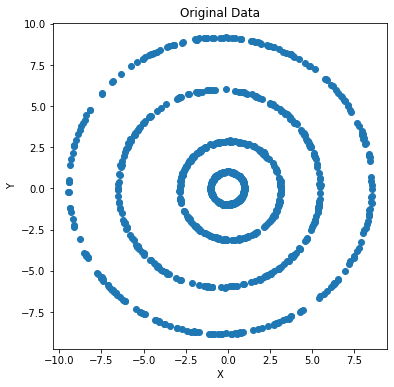

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Dataset.csv", names=['x', 'y']);

plt.figure(figsize=(6,6))

plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(df['x'], df['y'])

#plt.grid()
plt.show()

### Implementation of standard PCA

Varince explained by PC1 = 54.18%, PC2 = 45.82%


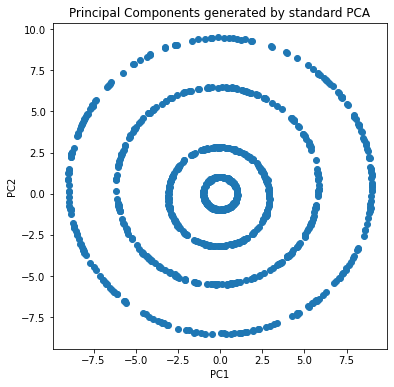

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Dataset.csv", names=['x', 'y']);
mean_vector = np.mean(df , axis = 0)
df_centered = df - mean_vector

input_data_set = df_centered.iloc[:, :].values
num_data_points = input_data_set.shape[0]

#Compute covarince: tranpose required to convert data points in column vector form
covariance_mat = np.dot(input_data_set.T, input_data_set) / num_data_points

eigen_values, eigen_vectors = np.linalg.eigh(covariance_mat)

sorted_index = np.flipud(np.argsort(eigen_values))#reverse the index for desc order

sorted_eigen_values = eigen_values[sorted_index]
sorted_eigen_vectors = eigen_vectors[:, sorted_index]

pc_data = np.dot(input_data_set, sorted_eigen_vectors)

total_variance = np.sum(sorted_eigen_values)
print("Varince explained by PC1 = {0:.2f}%, PC2 = {1:.2f}%".format((sorted_eigen_values[0]/total_variance)*100, 
                                                                   (sorted_eigen_values[1]/total_variance)*100))

plt.figure(figsize=(6,6))

plt.title("Principal Components generated by standard PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(pc_data[:, 0], pc_data[:, 1])

#plt.grid()
plt.show()